# Домашняя работа 5
## Применение математической статистики для проверки гипотез в реальной жизни для популярных метрик

## Задание 1
Вы провели эксперимент c упрощением формы заказа в магазине Утконос и получили результаты по метрике конверсий в покупку. Выберите метод оценки и оцените, есть ли стат.значимые различия между конверсиями в двух группах при alpha = 5%. 

Дайте краткие рекомендации команде.

Результаты: 
1. Число юзеров в группах, которые заходили на сайт в период эксперимента: n1 = 15550 и n2 = 15550. 
2. Число юзеров в группах, которые совершили хотя бы одну покупку за период эксперимента: n1 = 164 и n2 = 228
3. Конверсии : conv1 =  1.05%  conv2 =  1.47%


#### Используем z-критерий для конверсий.

In [16]:
import numpy as np
from scipy import stats
import math
from matplotlib import pyplot as plt

In [2]:
p1 = 164/15550
p2 = 228/15550
n1 = 15550
n2 = n1

Сначала рассчитаем общую объединенную долю:

In [3]:
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)
p_combined

0.012604501607717042

In [6]:
Z = (p1 - p2) / math.sqrt((p_combined * (1 - p_combined) * (1 / n1 + 1 / n2)))
Z

-3.253054722696254

In [8]:
p_values = stats.norm.sf(abs(Z))*2 
p_values

0.001141715077067056

#### Так как значение p-value (1.1%) значительно меньше, чем уровень значимости 5%, то нулевая гипотеза может быть отвергнута. Таким образом, действительно есть статистические различия в двух группах.
Упрощение формы действительно повлияло на конверсию пользователей в покупку. Рекомендация - внедрить упрощенную форму для всех пользователей магазина.

### Проверка 1:
Построим доверительный интервал разницы:

In [11]:
z1 = p2 - p1 + 1.96*math.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
z2 = p2 - p1 - 1.96*math.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
z1, z2

(0.006595120145915024, 0.0016363911081042678)

#### 0 не входит в данный интервал. Действительно, существуют статистические различия.

### Проверка 2:

#### Построим доверительный интервал 95% для контрольной группы.
Доверительный интервал: $$E = z \cdot \sqrt{\frac{p \cdot (1-p)}{n}}$$
где p - базовая конверсия, n - количество в выборке, z - количество сигм (2 для 95%, 3 для 99.8%)

In [14]:
e1 = 2 * np.sqrt((p1*(1-p1))/n1)

print("Доверительный интервал 1й выборки с 95% вероятностью: ({:.2%}, {:.2%})".format(p1-e1, p1+e1))

Доверительный интервал 1й выборки с 95% вероятностью: (0.89%, 1.22%)


In [15]:
e2 = 2 * np.sqrt((p2*(1-p2))/n2)

print("Доверительный интервал 2й выборки с 95% вероятностью: ({:.2%}, {:.2%})".format(p2-e2, p2+e2))

Доверительный интервал 2й выборки с 95% вероятностью: (1.27%, 1.66%)


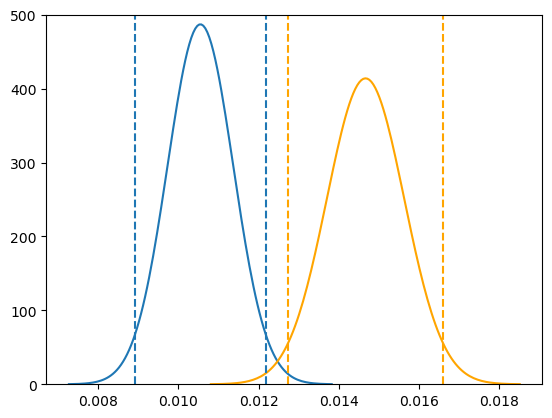

In [26]:
x1 = np.arange(p1-(e1/0.5), p1+(e1/0.5), 0.00005)
y1 = stats.norm.pdf(x1, p1, math.sqrt(p1*(1-p1)/n1))
x2 = np.arange(p2-(e2/0.5), p2+(e2/0.5), 0.00005)
y2 = stats.norm.pdf(x2, p2, math.sqrt(p2*(1-p2)/n2))
plt.ylim(0, 500)
plt.plot(x1, y1)
plt.plot(x2, y2, color='orange')
plt.axvline(p1-e1, linestyle='--')
plt.axvline(p1+e1, linestyle='--')
plt.axvline(p2-e2, color='orange', linestyle='--')
plt.axvline(p2+e2, color='orange', linestyle='--');

Видим, что доверительные интервалы не пересекаются. Различия статистически значимые.

## Задание 2
Сравниваем метрику конверсия в покупку. Размер выборки - 10000 элементов в каждой группе. Какой статистический критерий тут лучше всего подойдёт и почему?


При оценке статистической значимости изменения конверсии в покупку, используются, как правило:
- Хи-квадрат на однородность распределения, или
- Z-критерий долей

Эти два теста наиболее просты в интерпретации. Они требуют, чтобы выборки были независимыми (предположим, что в условии это так). Также соблюдается требование о достаточно большом размере выборки.
